# Stitch Two Pictures Together

Complete the following tasks to experiment with cuts for stitching pictures.

In [23]:
# Don't modify this cell, just run it. 
# get_seam() function is included in EC_CV. 

import numpy as np
import matplotlib.pyplot as plt
import cv2
from EC_CV import *
%config InlineBackend.figure_formats = 'retina'
from matplotlib import rcParams

rcParams['figure.figsize'] = 20,8


(2280, 1916, 3)
(2280, 1898, 3)


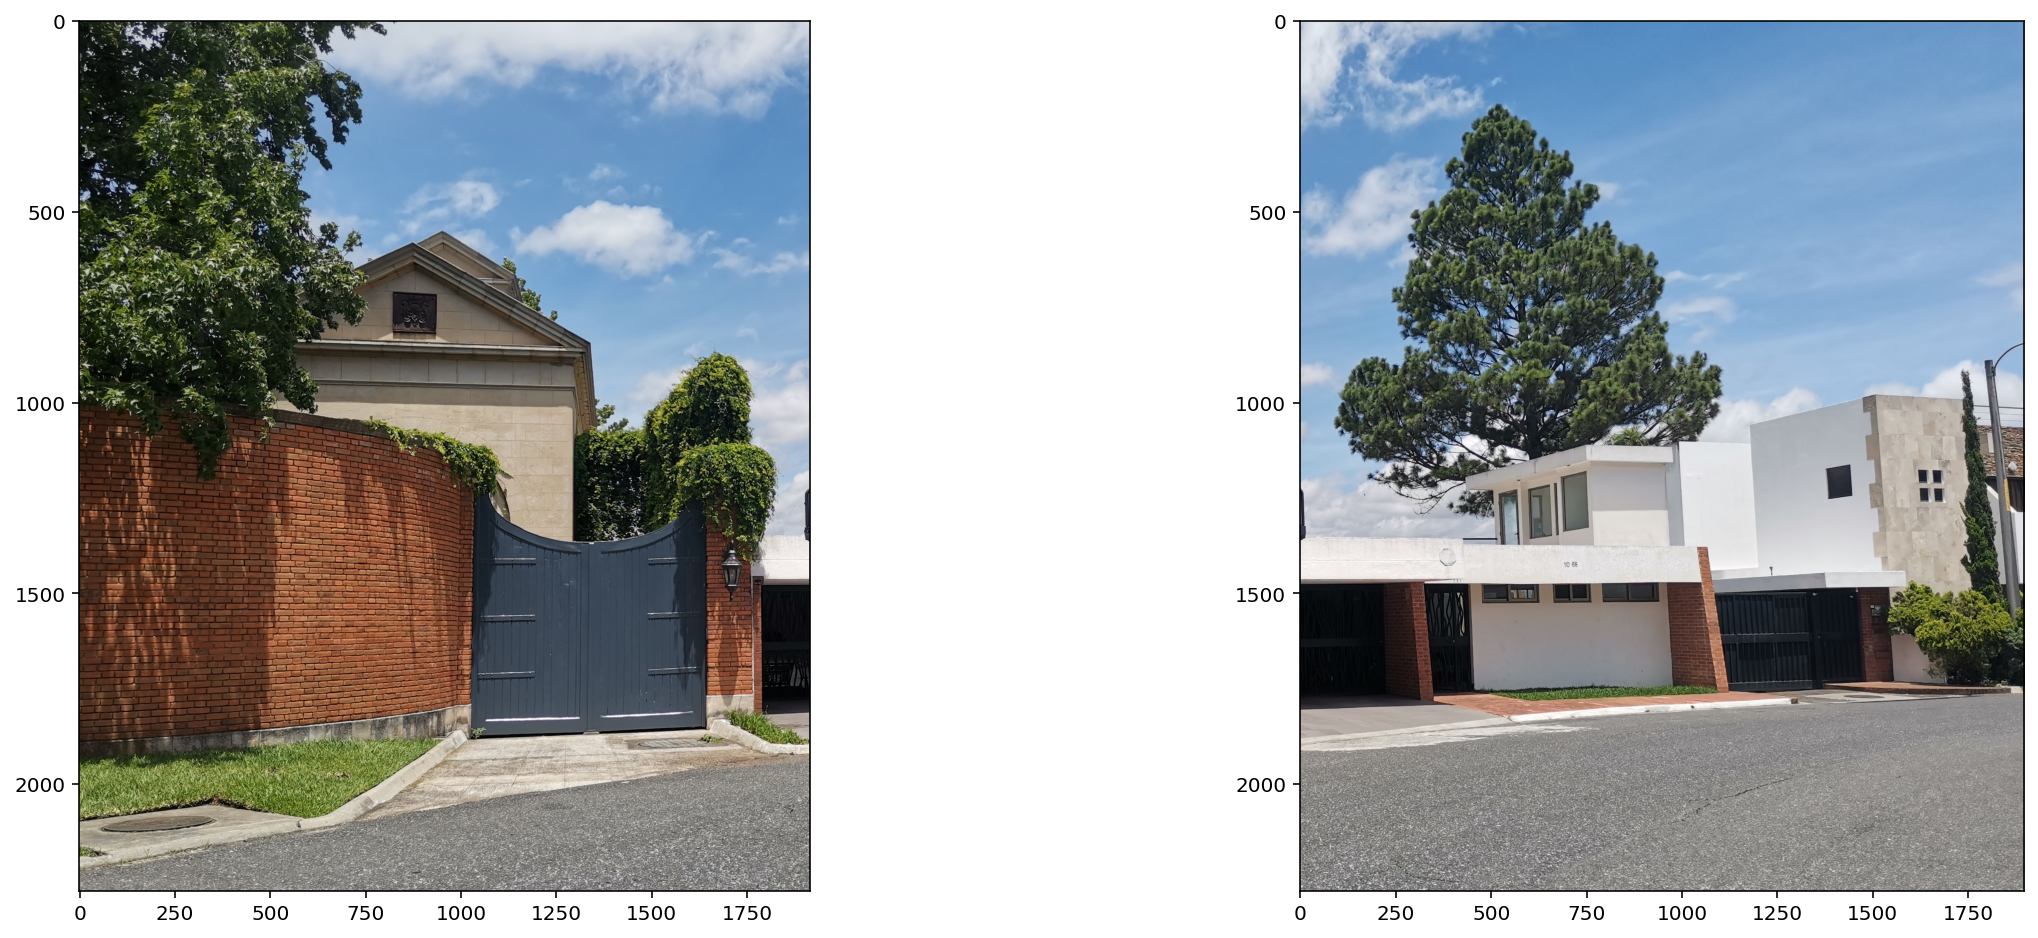

In [24]:
# Task #1: Choose a pair of images to stitch
#
# Copy two image files of your own in this folder, 
# open and display them both.
#
# These two images must have the same height, and must 
# be suitable for stitching together.

# Write your code here

imgL = plt.imread('neighL.bmp')
print(np.shape(imgL))
imgR = plt.imread('neighR.bmp')
print(np.shape(imgR))

# Let's see the two images side by side

rcParams['figure.figsize'] = 20,8
fig, ax = plt.subplots(1,2)
ax[0].imshow(imgL)
ax[1].imshow(imgR)


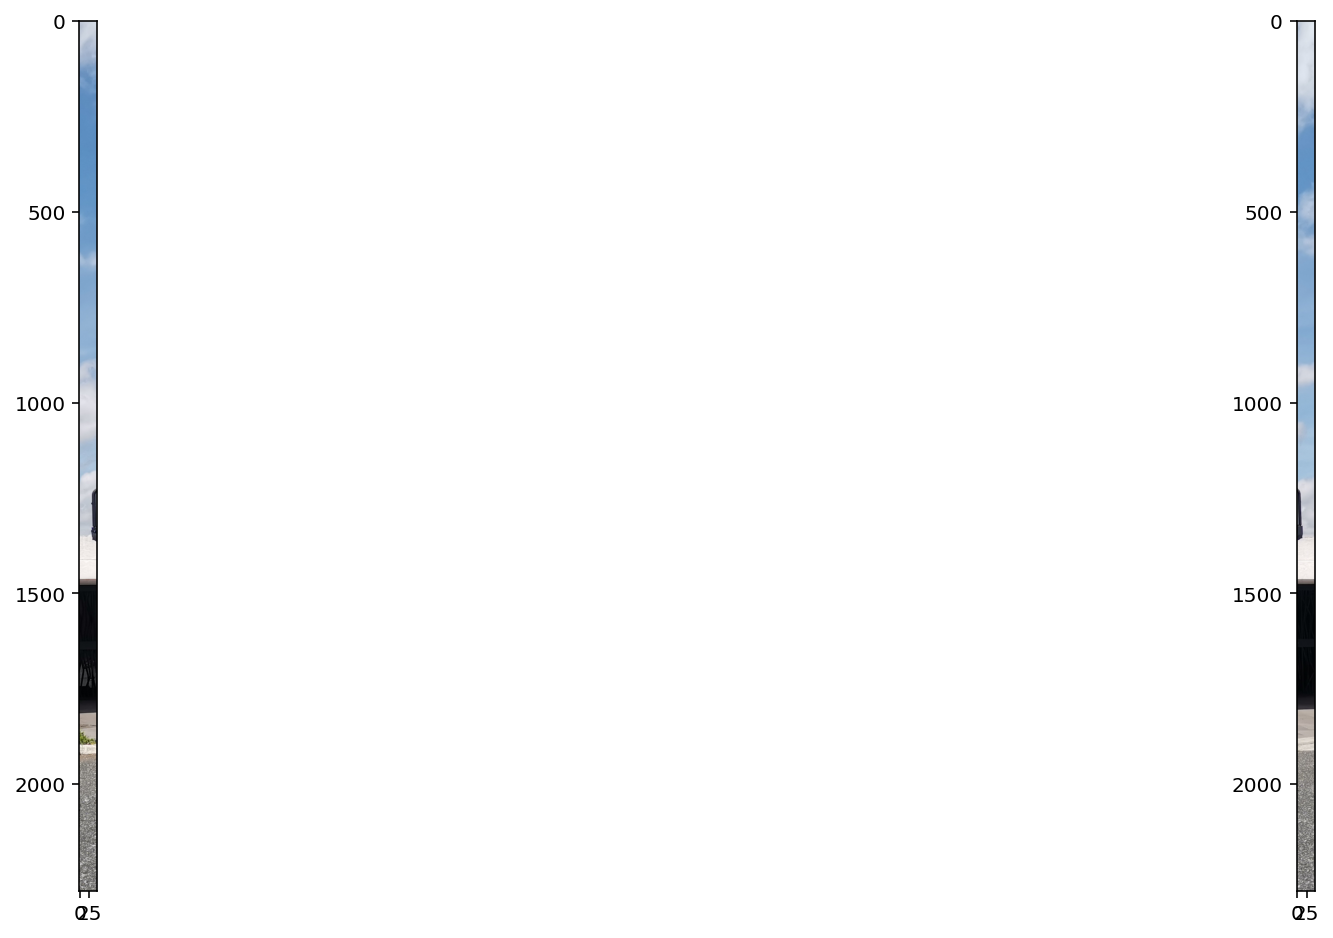

In [25]:
# Task #2: Find a suitable overlap for the 2 images and create a seam.
#
# In this cell, find an appropriate overlap for your images.
# This can be a number as small as 10 pixels, or as large as 100 pixels.
# It all depends on your pictures'resolution.
#
# Then produce an appropriate seam and display it.
# You may do this in several cells.

# Write your code here

# Let's look at the two images put together in a vertical 
# straight line at the middle of their overlap

overlap = 47 # also try 32
heightL, widthL, temp = imgL.shape
heightR, widthR, temp = imgR.shape
    
rcParams['figure.figsize'] = 20,8
tinyL = imgL[:,widthL-overlap:]
tinyR = imgR[:,:overlap]

fig, ax = plt.subplots(1,2)
ax[0].imshow(tinyL)
ax[1].imshow(tinyR)


2280
47


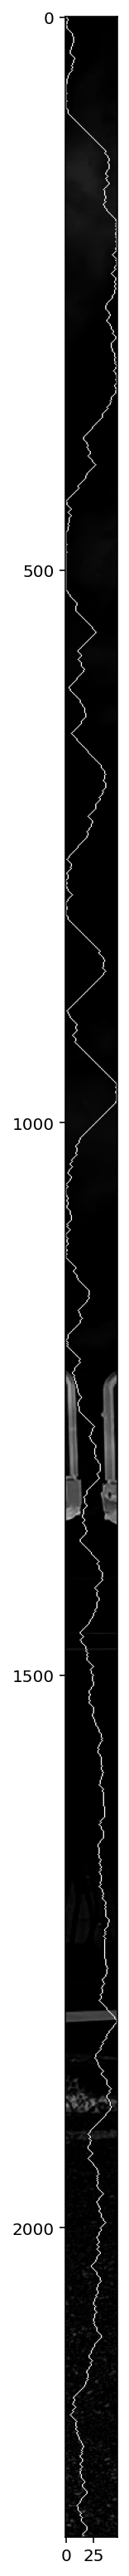

In [26]:
# Now let's caluclate their difference.

# Turn both sections to grayscale
tinyL_g = np.dot(tinyL[...,:3], [0.299,0.587,0.114])
tinyR_g = np.dot(tinyR[...,:3], [0.299,0.587,0.114])

# Calculate their squared difference
diff = cv2.subtract(tinyL_g,tinyR_g)
diff = cv2.multiply(diff,diff)

# Let's calculate the seam for the squared difference
rcParams['figure.figsize'] = 20,28
height, width = diff.shape
my_seam = get_seam(diff)


# Show the seam in the squared difference with white pixels
diff_seam = diff.copy()
height, width = diff.shape
for i in range(height):
    diff_seam[i,int(my_seam[i])] = 255 * 255 # This is white squared
plt.imshow(diff_seam,cmap='gray')
print(height)
print(width)


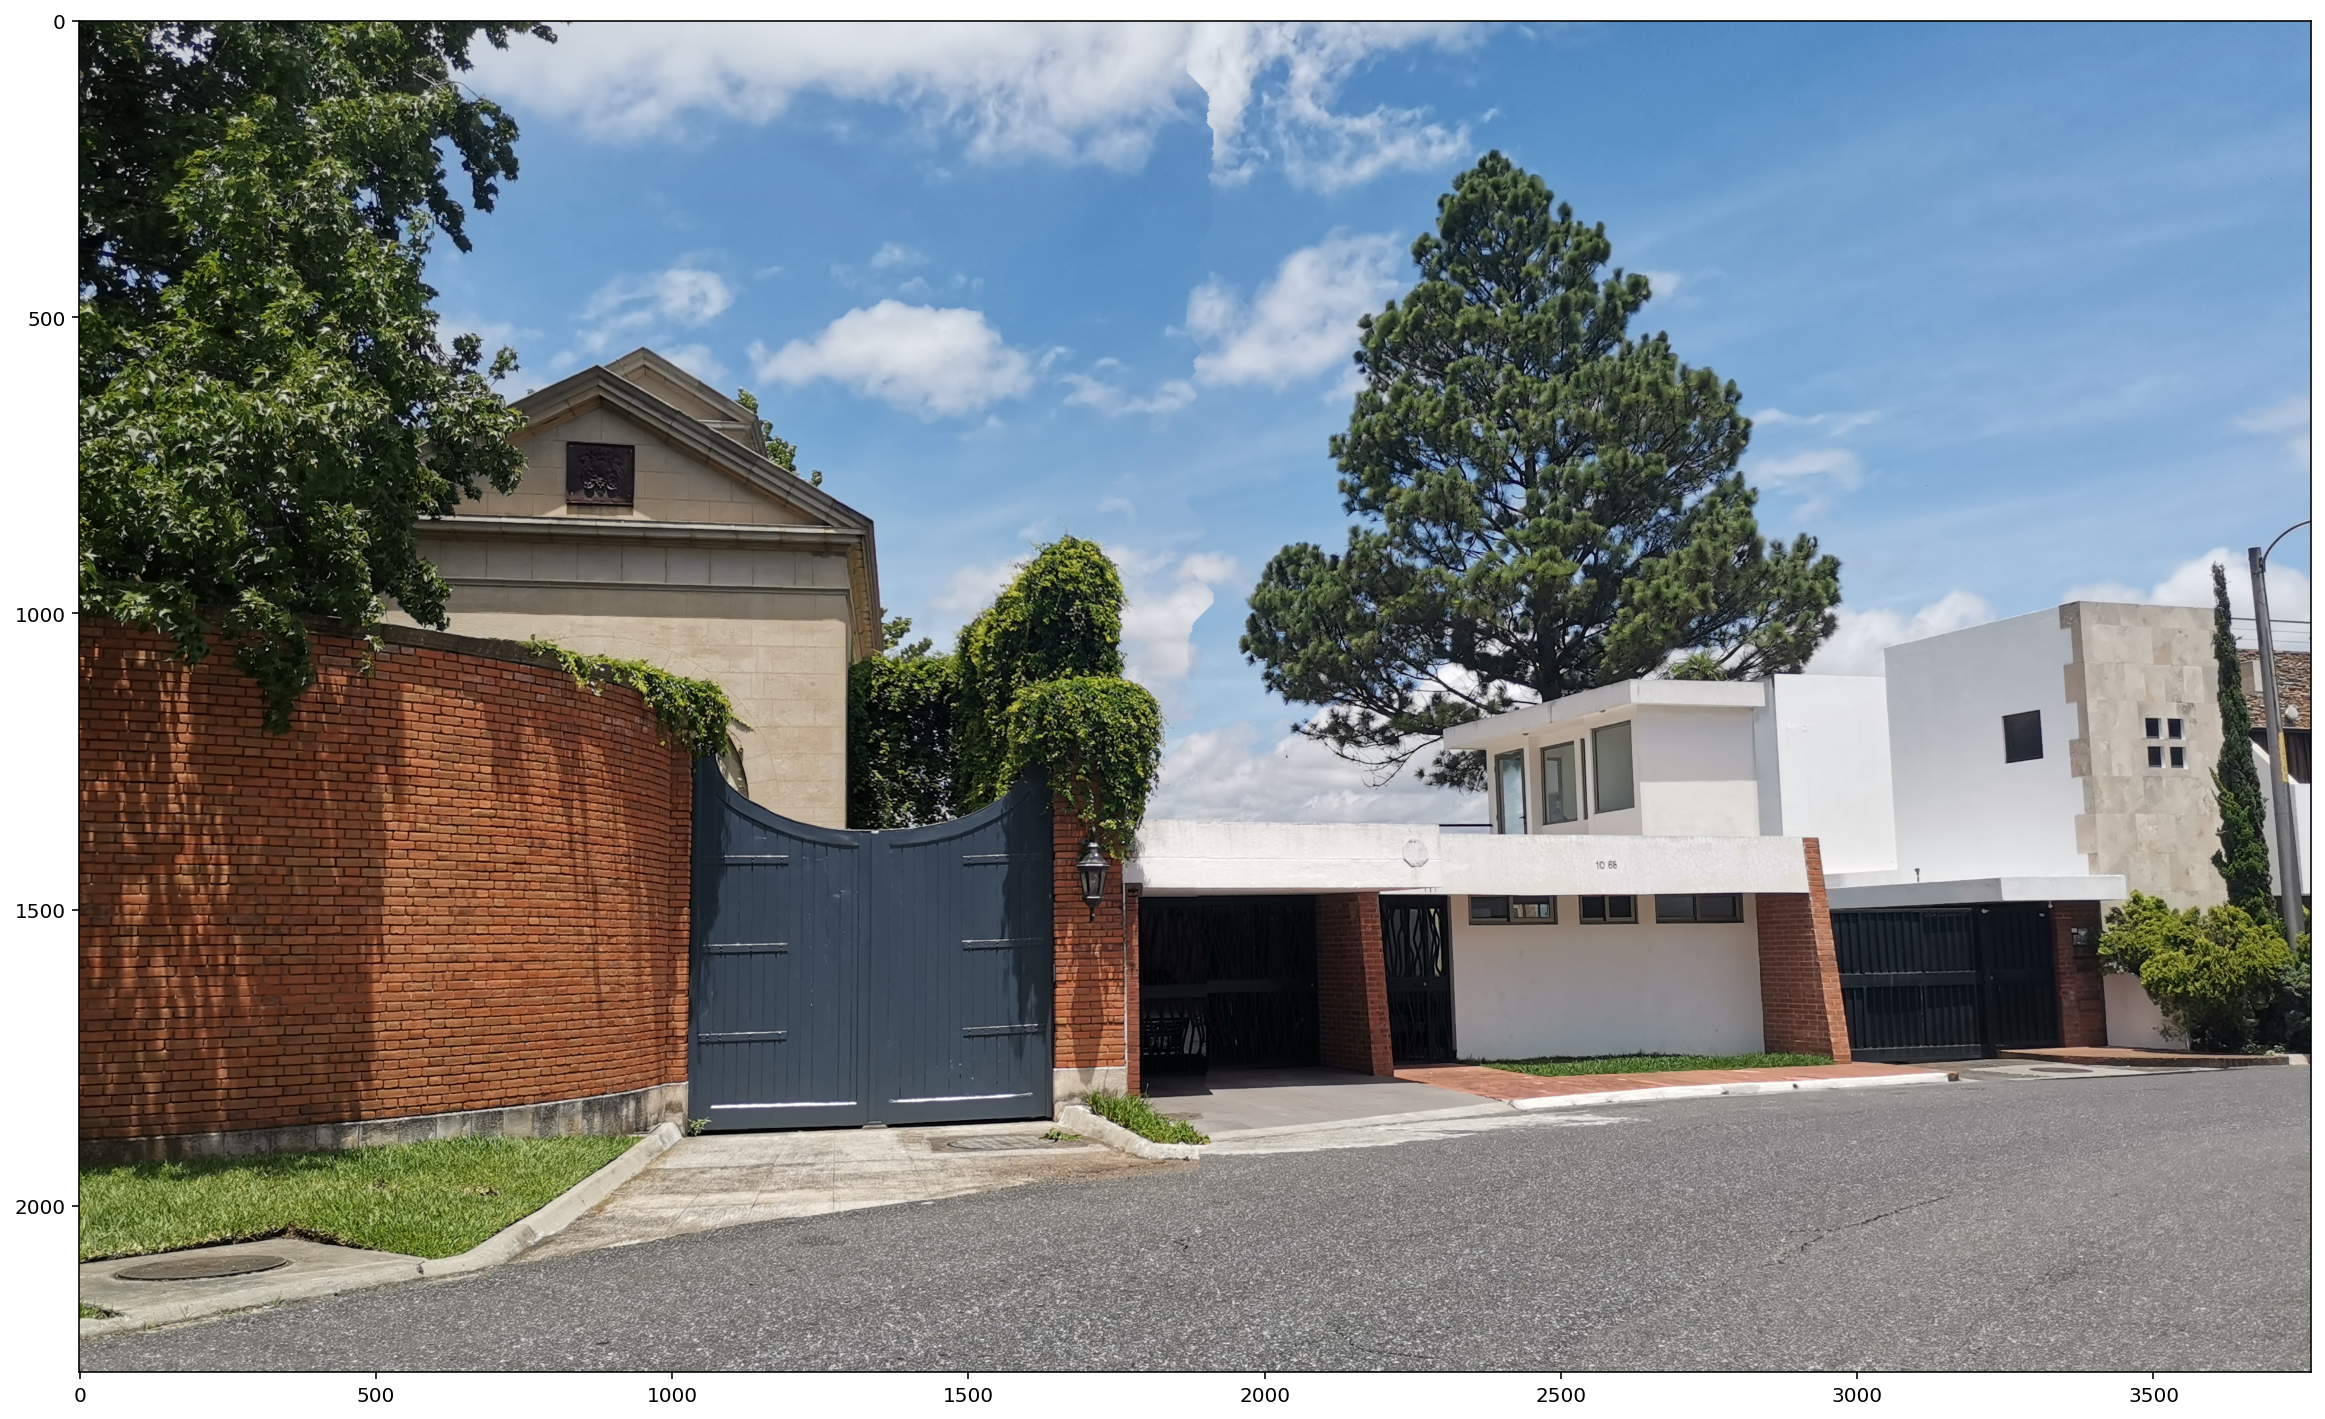

In [27]:
# Task #3: Stitch the images together.
#
# In this cell, put it all together.
# You may use 3 sections like I did.
# Display the final image.

# Write your code here

# First let's create the middle section.
# This is the overlapping section, with pixels from both Left and
# Right components. The seam determines where Left pixels stop
# and Right pixels start.

middle = tinyL.copy()    # Start with Left overlap.

# For every row in the middle section, replace Left pixels with 
# Right pixels starting at the seam.
for i in range(height):   
    j = int(my_seam[i])
    while j < width:
        middle[i,j] = tinyR[i,j]
        j += 1
    

# Now let's create the stitched image, not showing the seam.

cut_stitch = np.concatenate((imgL[:,:widthL-overlap], middle), axis=1)
cut_stitch = np.concatenate((cut_stitch, imgR[:,overlap:]), axis=1)
plt.imshow(cut_stitch)

## See any unnatural artifacts? 
## Try again with a different overlap.